# Phase 3 Project

## Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

%matplotlib inline

## Data Staging

In [3]:
df = pd.read_csv('syriatel_data.csv')

In [4]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [7]:
df.duplicated().sum()

0

## Data Visualization

In [8]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


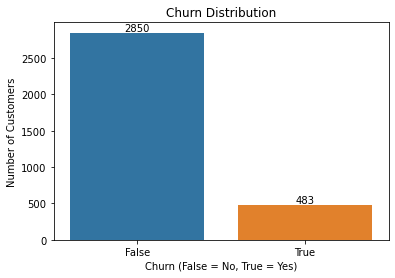

In [9]:
ax = sns.countplot(x='churn', data=df)
plt.title('Churn Distribution')
plt.xlabel('Churn (False = No, True = Yes)')
plt.ylabel('Number of Customers')

# Add labels to each bar
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',  # Text (count)
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position
        ha='center', va='center',  # Align center
        fontsize=10, color='black', xytext=(0, 5),  # Style
        textcoords='offset points'
    )

plt.show()

plt.show()

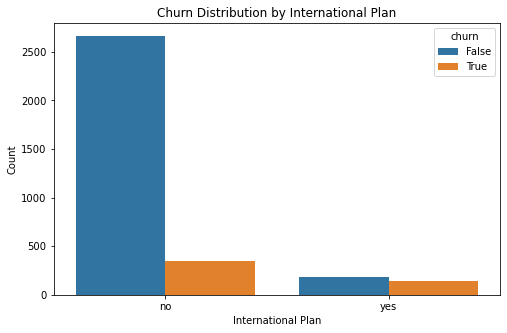

In [10]:
# Convert churn column to string type
df['churn'] = df['churn'].astype(str)

# Plot for churn vs. international plan
plt.figure(figsize=(8, 5))
sns.countplot(x='international plan', hue='churn', data=df)
plt.title('Churn Distribution by International Plan')
plt.xlabel('International Plan')
plt.ylabel('Count')
plt.show()

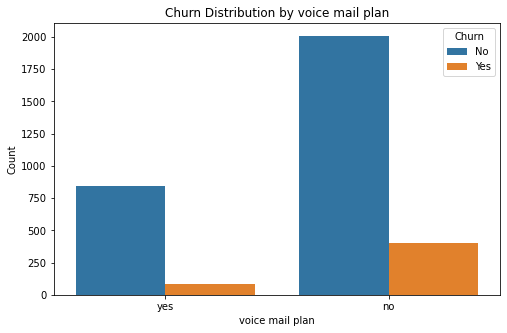

In [12]:
# Plot for churn vs. voice mail plan
plt.figure(figsize=(8, 5))
sns.countplot(x='voice mail plan', hue='churn', data=df)
plt.title('Churn Distribution by voice mail plan')
plt.xlabel('voice mail plan')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

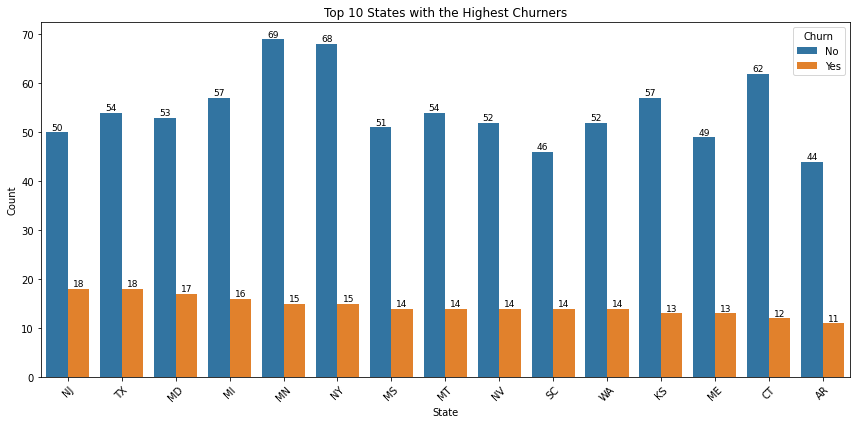

In [21]:
# Convert 'churn' to string for Seaborn compatibility
df['churn'] = df['churn'].astype(str)

# Calculate the number of churners per state
top_states_churners = (
    df[df['churn'] == 'True']  # Filter only churners
    .groupby('state')['churn']
    .count()
    .nlargest(15)  # Get top 10 states with the most churners
    .index
)

# Filter the original DataFrame for the top states
df_top_states = df[df['state'].isin(top_states_churners)]

# Create the countplot grouped by states and churn
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='state', hue='churn', data=df_top_states, order=top_states_churners)
plt.title('Top 10 States with the Highest Churners')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate state names for better readability

# Add labels to each bar
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',  # Text (count)
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position
        ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
        textcoords='offset points'
    )

plt.legend(title='Churn', labels=['No', 'Yes'])
plt.tight_layout()
plt.savefig('barplot.png')
plt.show()


In [14]:
df_corr = df.select_dtypes(include = 'number')
df_corr.corr()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796
area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572
number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263
total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423
total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942
total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427
total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985
total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423
total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987
total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288


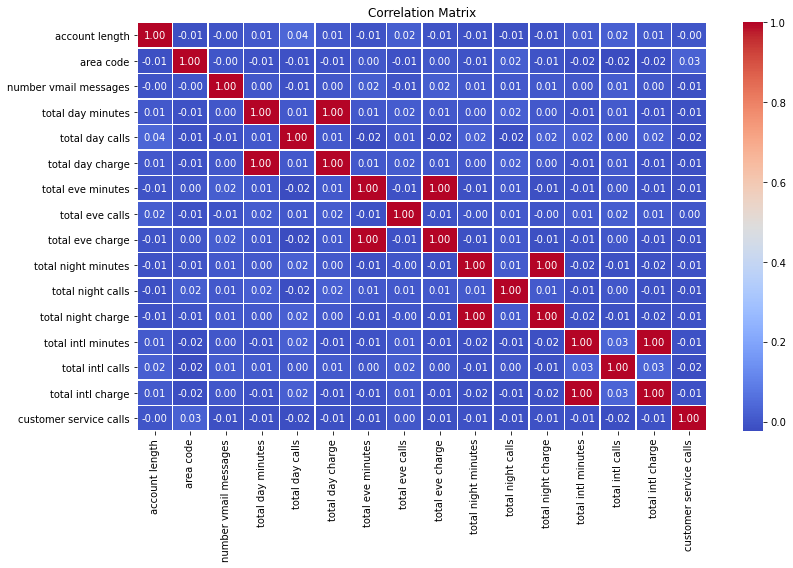

In [23]:
correlation_matrix = df_corr.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig("Heatmap")
plt.show()

Text(0.5, 1.0, 'ScatterPlot on Correlation')

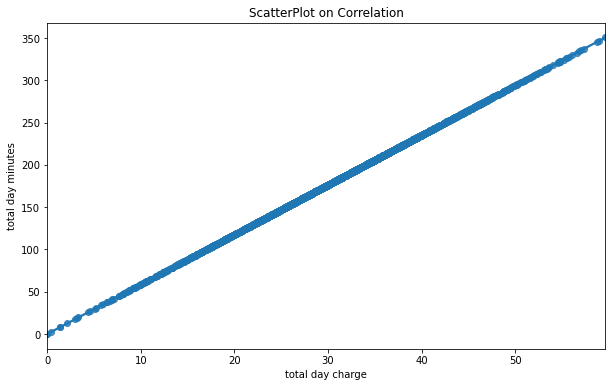

In [16]:
plt.figure(figsize = (10,6))

sns.regplot(data=df,x='total day charge',y='total day minutes')
plt.title('ScatterPlot on Correlation')

Text(0.5, 1.0, 'ScatterPlot on Correlation')

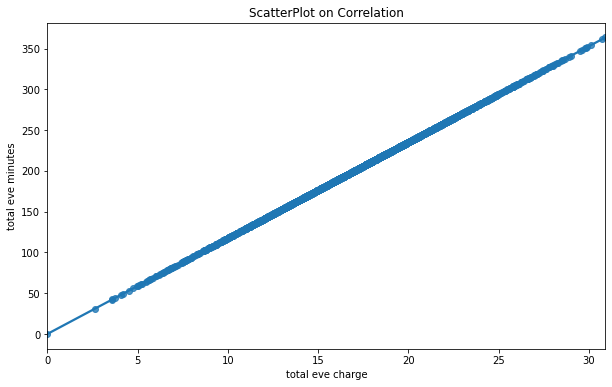

In [17]:
plt.figure(figsize = (10,6))

sns.regplot(data=df,x='total eve charge',y='total eve minutes')
plt.title('ScatterPlot on Correlation')

Text(0.5, 1.0, 'ScatterPlot on Correlation')

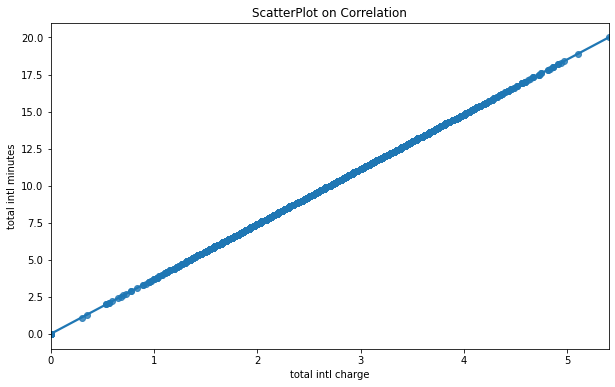

In [18]:
plt.figure(figsize = (10,6))

sns.regplot(data=df,x='total intl charge',y='total intl minutes')
plt.title('ScatterPlot on Correlation')